In [208]:
### Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [209]:
#Daten einlesen

PreRe1 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-10-56_Pre_C_Re_1.csv",delimiter=';',encoding='utf-8',decimal=',', skiprows=3)
PreRe2 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-11-05_Pre_C_Re_2.csv",delimiter=';',encoding='utf-8',decimal=',', skiprows=3)
PreRe3 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-11-05_Pre_C_Re_3.csv",delimiter=';',encoding='utf-8',decimal=',', skiprows=3)



time1 = PreRe1["time"]  # Zeit in Sekunden
time1 = time1 - time1[0]  #Offset entfernen, damit die Zeit bei 0 beginnt

time2 = PreRe2["time"]  
time2 = time2 - time2[0]  

time3 = PreRe3["time"]  
time3 = time3 - time3[0]    


C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\1093967346.py:3: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  PreRe1 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-10-56_Pre_C_Re_1.csv",delimiter=';',encoding='utf-8',decimal=',', skiprows=3)
C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\1093967346.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PreRe2 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-11-05_Pre_C_Re_2.csv",delimiter=';',encoding='utf-8',decimal=',', skiprows=3)
C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\1093967346.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PreRe3 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-11-05_Pre_C_Re_3.csv",delimiter=';',encoding='utf-8',decimal=',', skiprows=3)


In [210]:
#Ground Reaction Force (GRF) in N

GRFx1= PreRe1["Force plate group-Ground reaction force-x (N)"]
GRFy1= PreRe1["Force plate group-Ground reaction force-y (N)"]
GRFz1= PreRe1["Force plate group-Ground reaction force-z (N)"]

GRFx2= PreRe2["Force plate group-Ground reaction force-x (N)"]
GRFy2= PreRe2["Force plate group-Ground reaction force-y (N)"]
GRFz2= PreRe2["Force plate group-Ground reaction force-z (N)"]

GRFx3= PreRe3["Force plate group-Ground reaction force-x (N)"]
GRFy3= PreRe3["Force plate group-Ground reaction force-y (N)"]
GRFz3= PreRe3["Force plate group-Ground reaction force-z (N)"]


#detect landing peaks in GRFz1, GRFz2, GRFz3
peaks1, _ = find_peaks(GRFz1, height=5000)  # Find peaks in GRFz1
peaks2, _ = find_peaks(GRFz2, height=5000)  # Find peaks in GRFz2
peaks3, _ = find_peaks(GRFz3, height=5000)  # Find peaks in GRFz3
print("Peaks in GRFz1: ", peaks1)
print("Zeitpunkt Peak1: ",time1[peaks1])
print("Peaks in GRFz2: ", peaks2)
print("Zeitpunkt Peak2: ",time2[peaks2])
print("Peaks in GRFz3: ", peaks3)
print("Zeitpunkt Peak3: ",time3[peaks3])



# plt.figure(figsize=(10, 5))
# plt.plot(time3, GRFx3, label='GRFx', color='blue')
# plt.plot(time3, GRFy3, label='GRFy', color='red')
# plt.plot(time3, GRFz3, label='GRFz', color='green')
# plt.title('Ground Reaction Force (GRF)')
# plt.xlabel('Time (s)')
# plt.ylabel('Force / N')
# #mark landing peak with an x 
# plt.scatter(time3[peaks3], GRFz3[peaks3], color='black', label='Landing Peaks', marker='x')
# plt.legend()
# plt.grid()
# plt.show()




Peaks in GRFz1:  [3418]
Zeitpunkt Peak1:  3418    3.418
Name: time, dtype: float64
Peaks in GRFz2:  [3223]
Zeitpunkt Peak2:  3223    3.223
Name: time, dtype: float64
Peaks in GRFz3:  [2963]
Zeitpunkt Peak3:  2963    2.963
Name: time, dtype: float64


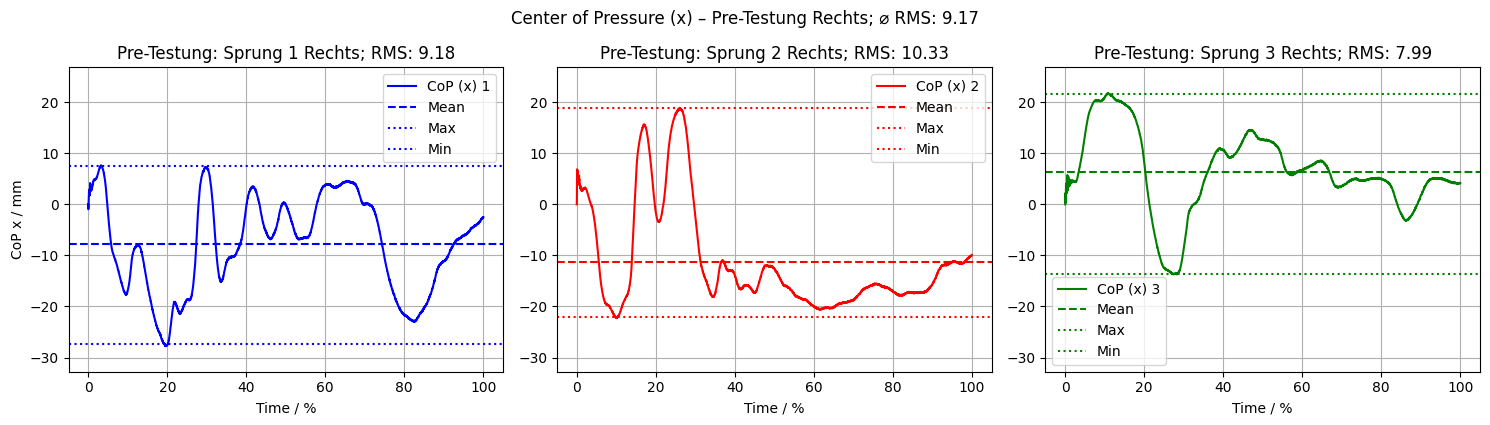

9.17825997083756 10.326140819701491 7.9933450728969255


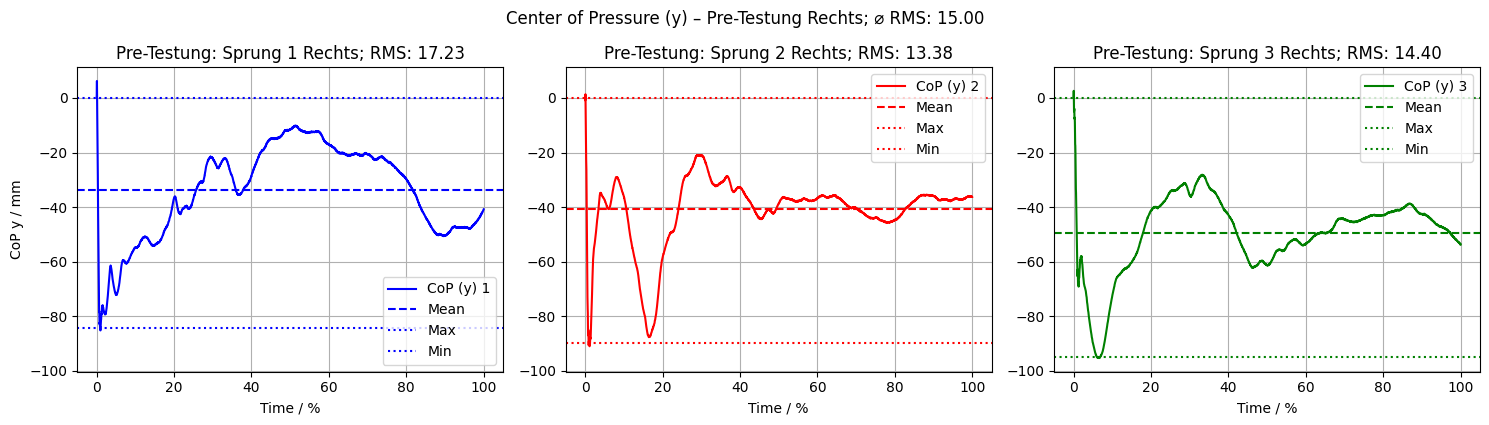

17.232394120719533 13.379005506125907 14.396314491495808


In [211]:
#Center of Pressure (CoP) in mm

CoPx1 = PreRe1["Force plate group-Center of pressure-x (mm)"]
CoPy1 = PreRe1["Force plate group-Center of pressure-y (mm)"]

CoPx2 = PreRe2["Force plate group-Center of pressure-x (mm)"]
CoPy2 = PreRe2["Force plate group-Center of pressure-y (mm)"]

CoPx3 = PreRe3["Force plate group-Center of pressure-x (mm)"]
CoPy3 = PreRe3["Force plate group-Center of pressure-y (mm)"]

# Normalisieren der CoP-Daten ab dem Landepeak auf 100%
CoPx1_norm = CoPx1[peaks1[0]:] - CoPx1[peaks1[0]]
CoPy1_norm = CoPy1[peaks1[0]:] - CoPy1[peaks1[0]]
CoPx2_norm = CoPx2[peaks2[0]:] - CoPx2[peaks2[0]]
CoPy2_norm = CoPy2[peaks2[0]:] - CoPy2[peaks2[0]]
CoPx3_norm = CoPx3[peaks3[0]:] - CoPx3[peaks3[0]]
CoPy3_norm = CoPy3[peaks3[0]:] - CoPy3[peaks3[0]]
# Normalisieren der Zeit ab dem Landepeak auf 100%
time1_norm = time1[peaks1[0]:] - time1[peaks1[0]]
time2_norm = time2[peaks2[0]:] - time2[peaks2[0]]
time3_norm = time3[peaks3[0]:] - time3[peaks3[0]]
# Normalisieren der Zeit auf 100%
time1_norm = time1_norm / time1_norm.max() * 100
time2_norm = time2_norm / time2_norm.max() * 100
time3_norm = time3_norm / time3_norm.max() * 100

from scipy.interpolate import interp1d
import numpy as np

def resample_to_100(time, signal):
    f = interp1d(time, signal, kind='linear')
    time_uniform = np.linspace(0, 100, 100)
    signal_uniform = f(time_uniform)
    return signal_uniform

copx1_100 = resample_to_100(time1_norm, CoPx1_norm)
copx2_100 = resample_to_100(time2_norm, CoPx2_norm)
copx3_100 = resample_to_100(time3_norm, CoPx3_norm)

#Durchschnitt jeweils über die drei Proben bilden
copx1_mean = np.mean(copx1_100)
copx1_max = np.max(copx1_100)
copx1_min = np.min(copx1_100)
copx1_rms = np.sqrt(np.mean((copx1_100 - copx1_mean) ** 2))
copx2_mean = np.mean(copx2_100)
copx2_max = np.max(copx2_100)
copx2_min = np.min(copx2_100)
copx2_rms = np.sqrt(np.mean((copx2_100 - copx2_mean) ** 2))
copx3_mean = np.mean(copx3_100)
copx3_max = np.max(copx3_100)
copx3_min = np.min(copx3_100)
copx3_rms = np.sqrt(np.mean((copx3_100 - copx3_mean) ** 2))
mean_rms = np.mean([copx1_rms, copx2_rms, copx3_rms])

# Gemeinsames Y-Limit für alle Plots berechnen
ymin = min(CoPx1_norm.min(), CoPx2_norm.min(), CoPx3_norm.min())
ymax = max(CoPx1_norm.max(), CoPx2_norm.max(), CoPx3_norm.max())

# Optional: etwas Rand hinzufügen
padding = 5  # z. B. 5 mm
ymin -= padding
ymax += padding

plt.figure(figsize=(15, 4))

# --- Subplot 1: CoPx1 ---
plt.subplot(1, 3, 1)
plt.plot(time1_norm, CoPx1_norm, color='blue', label='CoP (x) 1')
plt.axhline(y=copx1_mean, color='blue', linestyle='--', label='Mean')
plt.axhline(y=copx1_max, color='blue', linestyle=':', label='Max')
plt.axhline(y=copx1_min, color='blue', linestyle=':', label='Min')
plt.title('Pre-Testung: Sprung 1 Rechts; RMS: {:.2f}'.format(copx1_rms))
plt.xlabel('Time / %')
plt.ylabel('CoP x / mm')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

# --- Subplot 2: CoPx2 ---
plt.subplot(1, 3, 2)
plt.plot(time2_norm, CoPx2_norm, color='red', label='CoP (x) 2')
plt.axhline(y=copx2_mean, color='red', linestyle='--', label='Mean')
plt.axhline(y=copx2_max, color='red', linestyle=':', label='Max')
plt.axhline(y=copx2_min, color='red', linestyle=':', label='Min')
plt.title('Pre-Testung: Sprung 2 Rechts; RMS: {:.2f}'.format(copx2_rms))
plt.xlabel('Time / %')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

# --- Subplot 3: CoPx3 ---
plt.subplot(1, 3, 3)
plt.plot(time3_norm, CoPx3_norm, color='green', label='CoP (x) 3')
plt.axhline(y=copx3_mean, color='green', linestyle='--', label='Mean')
plt.axhline(y=copx3_max, color='green', linestyle=':', label='Max')
plt.axhline(y=copx3_min, color='green', linestyle=':', label='Min')
plt.title('Pre-Testung: Sprung 3 Rechts; RMS: {:.2f}'.format(copx3_rms))
plt.xlabel('Time / %')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

plt.tight_layout()
plt.suptitle('Center of Pressure (x) – Pre-Testung Rechts; ⌀ RMS: {:.2f}'.format(mean_rms), y=1.05)
plt.show()

print(copx1_rms, copx2_rms, copx3_rms)

#Neuer Plot für CoPy
# Normalisieren der CoP-Daten ab dem Landepeak auf 100%
CoPy1_norm = CoPy1[peaks1[0]:] - CoPy1[peaks1[0]]
CoPy2_norm = CoPy2[peaks2[0]:] - CoPy2[peaks2[0]]
CoPy3_norm = CoPy3[peaks3[0]:] - CoPy3[peaks3[0]]
# Normalisieren der Zeit ab dem Landepeak auf 100%
time1_norm = time1[peaks1[0]:] - time1[peaks1[0]]
time2_norm = time2[peaks2[0]:] - time2[peaks2[0]]
time3_norm = time3[peaks3[0]:] - time3[peaks3[0]]
# Normalisieren der Zeit auf 100%
time1_norm = time1_norm / time1_norm.max() * 100
time2_norm = time2_norm / time2_norm.max() * 100
time3_norm = time3_norm / time3_norm.max() * 100
# Resampling auf 100 Punkte
copy1_100 = resample_to_100(time1_norm, CoPy1_norm)
copy2_100 = resample_to_100(time2_norm, CoPy2_norm)
copy3_100 = resample_to_100(time3_norm, CoPy3_norm)
#Durchschnitt jeweils über die drei Proben bilden
copy1_mean = np.mean(copy1_100)
copy1_max = np.max(copy1_100)
copy1_min = np.min(copy1_100)
copy1_rms = np.sqrt(np.mean((copy1_100 - copy1_mean) ** 2))
copy2_mean = np.mean(copy2_100)
copy2_max = np.max(copy2_100)
copy2_min = np.min(copy2_100)
copy2_rms = np.sqrt(np.mean((copy2_100 - copy2_mean) ** 2))
copy3_mean = np.mean(copy3_100)
copy3_max = np.max(copy3_100)
copy3_min = np.min(copy3_100)
copy3_rms = np.sqrt(np.mean((copy3_100 - copy3_mean) ** 2))
mean_rms = np.mean([copy1_rms, copy2_rms, copy3_rms])
# Gemeinsames Y-Limit für alle Plots berechnen
ymin = min(CoPy1_norm.min(), CoPy2_norm.min(), CoPy3_norm.min())
ymax = max(CoPy1_norm.max(), CoPy2_norm.max(), CoPy3_norm.max())
# Optional: etwas Rand hinzufügen
padding = 5  # z. B. 5 mm
ymin -= padding
ymax += padding
plt.figure(figsize=(15, 4))
# --- Subplot 1: CoPy1 ---
plt.subplot(1, 3, 1)
plt.plot(time1_norm, CoPy1_norm, color='blue', label='CoP (y) 1')
plt.axhline(y=copy1_mean, color='blue', linestyle='--', label='Mean')
plt.axhline(y=copy1_max, color='blue', linestyle=':', label='Max')
plt.axhline(y=copy1_min, color='blue', linestyle=':', label='Min')
plt.title('Pre-Testung: Sprung 1 Rechts; RMS: {:.2f}'.format(copy1_rms))
plt.xlabel('Time / %')
plt.ylabel('CoP y / mm')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()
# --- Subplot 2: CoPy2 ---
plt.subplot(1, 3, 2)
plt.plot(time2_norm, CoPy2_norm, color='red', label='CoP (y) 2')
plt.axhline(y=copy2_mean, color='red', linestyle='--', label='Mean')
plt.axhline(y=copy2_max, color='red', linestyle=':', label='Max')
plt.axhline(y=copy2_min, color='red', linestyle=':', label='Min')
plt.title('Pre-Testung: Sprung 2 Rechts; RMS: {:.2f}'.format(copy2_rms))
plt.xlabel('Time / %')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()
# --- Subplot 3: CoPy3 ---
plt.subplot(1, 3, 3)
plt.plot(time3_norm, CoPy3_norm, color='green', label='CoP (y) 3')
plt.axhline(y=copy3_mean, color='green', linestyle='--', label='Mean')
plt.axhline(y=copy3_max, color='green', linestyle=':', label='Max')
plt.axhline(y=copy3_min, color='green', linestyle=':', label='Min')
plt.title('Pre-Testung: Sprung 3 Rechts; RMS: {:.2f}'.format(copy3_rms))
plt.xlabel('Time / %')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()
plt.tight_layout()
plt.suptitle('Center of Pressure (y) – Pre-Testung Rechts; ⌀ RMS: {:.2f}'.format(mean_rms), y=1.05)
plt.show()
print(copy1_rms, copy2_rms, copy3_rms)



C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\1426236040.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PreLi1 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-11-07_Pre_C_Li_1.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\1426236040.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PreLi2 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-11-09_Pre_C_Li_2.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\1426236040.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PreLi3 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-11-09_Pre_C_Li_3.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)


Peaks in GRFz1:  [3241]
Zeitpunkt Peak1:  3241    3.241
Name: time, dtype: float64
Peaks in GRFz2:  [2769]
Zeitpunkt Peak2:  2769    2.769
Name: time, dtype: float64
Peaks in GRFz3:  [3545]
Zeitpunkt Peak3:  3545    3.545
Name: time, dtype: float64


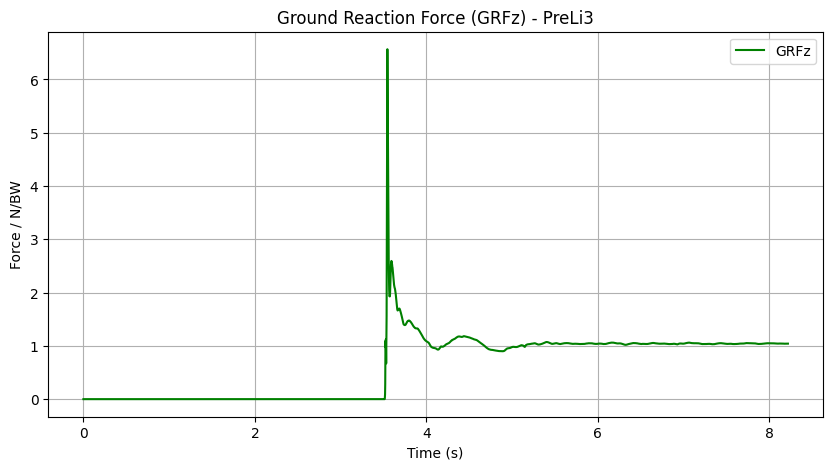

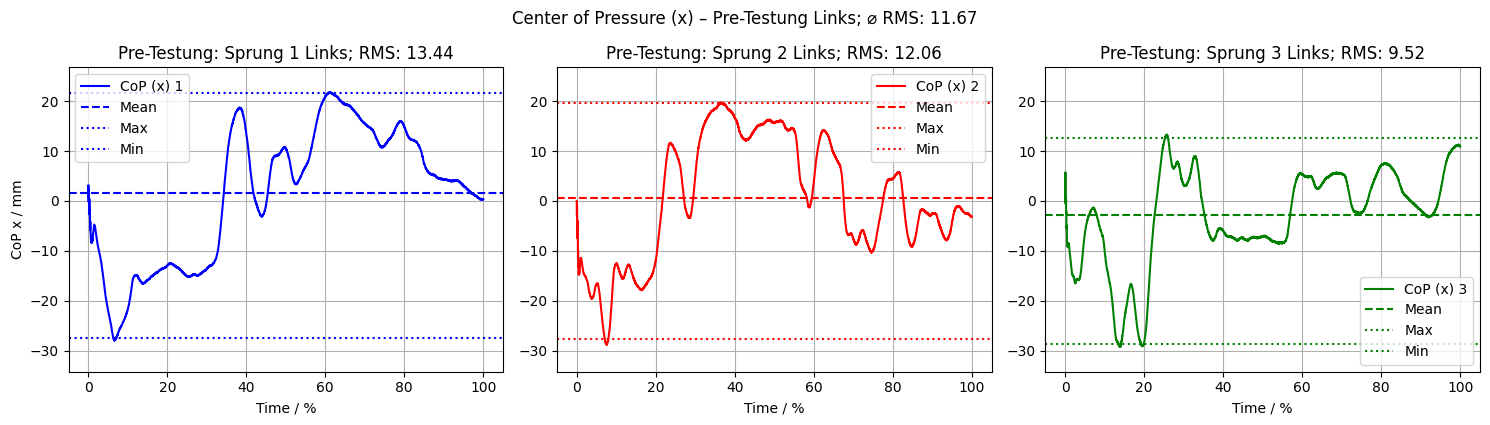

RMS-Werte: 13.438470983425129 12.057660840711844 9.515896972272392


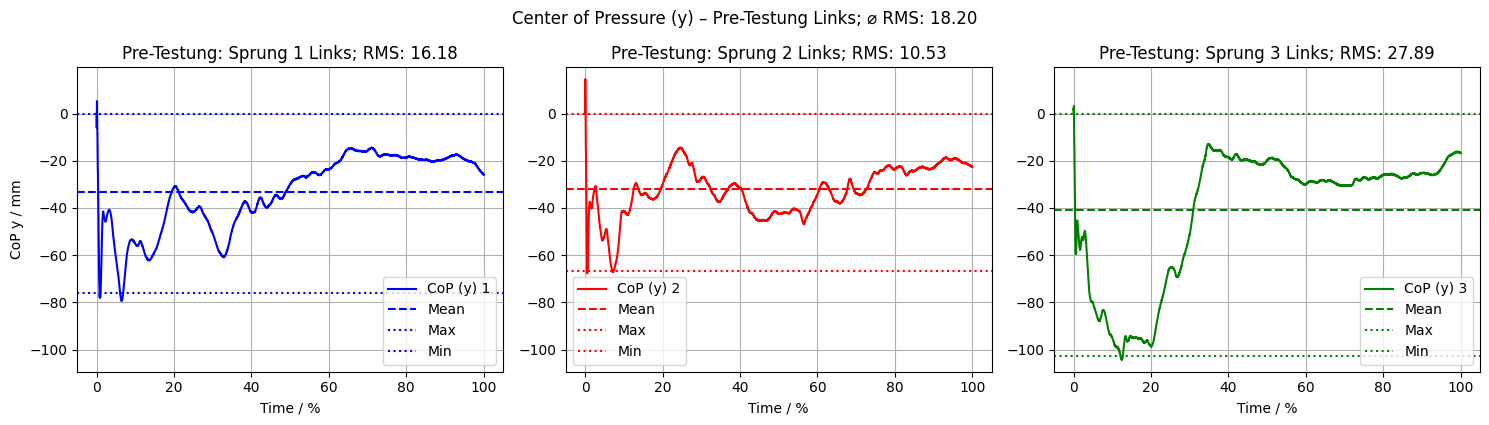

RMS-Werte: 16.184997831032298 10.533482596159617 27.89088881427258


In [212]:
# CSVs für links einlesen
PreLi1 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-11-07_Pre_C_Li_1.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
PreLi2 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-11-09_Pre_C_Li_2.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
PreLi3 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-11-09_Pre_C_Li_3.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)

# Zeitachsen bereinigen
time1 = PreLi1["time"] - PreLi1["time"][0]
time2 = PreLi2["time"] - PreLi2["time"][0]
time3 = PreLi3["time"] - PreLi3["time"][0]

# GRFz extrahieren für Landungserkennung
GRFz1 = PreLi1["Force plate group-Ground reaction force-z (N)"]
GRFz2 = PreLi2["Force plate group-Ground reaction force-z (N)"]
GRFz3 = PreLi3["Force plate group-Ground reaction force-z (N)"]

Fg_Till = 78*9.81  # Gewichtskraft in N
GRFz3_rel = GRFz3/Fg_Till  # Gewichtskraft abziehen

# Landepeaks erkennen
from scipy.signal import find_peaks

peaks1, _ = find_peaks(GRFz1, height=5000)
peaks2, _ = find_peaks(GRFz2, height=5000)
peaks3, _ = find_peaks(GRFz3, height=5000)
print("Peaks in GRFz1: ", peaks1)
print("Zeitpunkt Peak1: ",time1[peaks1])
print("Peaks in GRFz2: ", peaks2)
print("Zeitpunkt Peak2: ",time2[peaks2])
print("Peaks in GRFz3: ", peaks3)
print("Zeitpunkt Peak3: ",time3[peaks3])

# GRFz PreLi3 plotten
plt.figure(figsize=(10, 5))
plt.plot(time3, GRFz3_rel, label='GRFz', color='green')
plt.title('Ground Reaction Force (GRFz) - PreLi3')
plt.xlabel('Time (s)')
plt.ylabel('Force / N/BW')
# Landepeak mit X markieren
#plt.scatter(time3[peaks3], GRFz3[peaks3], color='black', label='Landing Peaks', marker='x')
plt.legend()
plt.grid()
plt.show()

# CoP x extrahieren
CoPx1 = PreLi1["Force plate group-Center of pressure-x (mm)"]
CoPx2 = PreLi2["Force plate group-Center of pressure-x (mm)"]
CoPx3 = PreLi3["Force plate group-Center of pressure-x (mm)"]

# Normieren ab Landezeitpunkt
CoPx1_norm = CoPx1[peaks1[0]:] - CoPx1[peaks1[0]]
CoPx2_norm = CoPx2[peaks2[0]:] - CoPx2[peaks2[0]]
CoPx3_norm = CoPx3[peaks3[0]:] - CoPx3[peaks3[0]]
time1_norm = time1[peaks1[0]:] - time1[peaks1[0]]
time2_norm = time2[peaks2[0]:] - time2[peaks2[0]]
time3_norm = time3[peaks3[0]:] - time3[peaks3[0]]
time1_norm = time1_norm / time1_norm.max() * 100
time2_norm = time2_norm / time2_norm.max() * 100
time3_norm = time3_norm / time3_norm.max() * 100

# Interpolation auf 100 Punkte
from scipy.interpolate import interp1d
import numpy as np

def resample_to_100(time, signal):
    f = interp1d(time, signal, kind='linear')
    time_uniform = np.linspace(0, 100, 100)
    signal_uniform = f(time_uniform)
    return signal_uniform

copx1_100 = resample_to_100(time1_norm, CoPx1_norm)
copx2_100 = resample_to_100(time2_norm, CoPx2_norm)
copx3_100 = resample_to_100(time3_norm, CoPx3_norm)

# Kennwerte berechnen
copx1_mean = np.mean(copx1_100)
copx1_max = np.max(copx1_100)
copx1_min = np.min(copx1_100)
copx1_rms = np.sqrt(np.mean((copx1_100 - copx1_mean) ** 2))

copx2_mean = np.mean(copx2_100)
copx2_max = np.max(copx2_100)
copx2_min = np.min(copx2_100)
copx2_rms = np.sqrt(np.mean((copx2_100 - copx2_mean) ** 2))

copx3_mean = np.mean(copx3_100)
copx3_max = np.max(copx3_100)
copx3_min = np.min(copx3_100)
copx3_rms = np.sqrt(np.mean((copx3_100 - copx3_mean) ** 2))

mean_rms = np.mean([copx1_rms, copx2_rms, copx3_rms])

# Gemeinsame Y-Achse
ymin = min(CoPx1_norm.min(), CoPx2_norm.min(), CoPx3_norm.min()) - 5
ymax = max(CoPx1_norm.max(), CoPx2_norm.max(), CoPx3_norm.max()) + 5

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(time1_norm, CoPx1_norm, color='blue', label='CoP (x) 1')
plt.axhline(y=copx1_mean, color='blue', linestyle='--', label='Mean')
plt.axhline(y=copx1_max, color='blue', linestyle=':', label='Max')
plt.axhline(y=copx1_min, color='blue', linestyle=':', label='Min')
plt.title('Pre-Testung: Sprung 1 Links; RMS: {:.2f}'.format(copx1_rms))
plt.xlabel('Time / %')
plt.ylabel('CoP x / mm')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(time2_norm, CoPx2_norm, color='red', label='CoP (x) 2')
plt.axhline(y=copx2_mean, color='red', linestyle='--', label='Mean')
plt.axhline(y=copx2_max, color='red', linestyle=':', label='Max')
plt.axhline(y=copx2_min, color='red', linestyle=':', label='Min')
plt.title('Pre-Testung: Sprung 2 Links; RMS: {:.2f}'.format(copx2_rms))
plt.xlabel('Time / %')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(time3_norm, CoPx3_norm, color='green', label='CoP (x) 3')
plt.axhline(y=copx3_mean, color='green', linestyle='--', label='Mean')
plt.axhline(y=copx3_max, color='green', linestyle=':', label='Max')
plt.axhline(y=copx3_min, color='green', linestyle=':', label='Min')
plt.title('Pre-Testung: Sprung 3 Links; RMS: {:.2f}'.format(copx3_rms))
plt.xlabel('Time / %')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

plt.tight_layout()
plt.suptitle('Center of Pressure (x) – Pre-Testung Links; ⌀ RMS: {:.2f}'.format(mean_rms), y=1.05)
plt.show()

print("RMS-Werte:", copx1_rms, copx2_rms, copx3_rms)

# CoPy y extrahieren
CoPy1 = PreLi1["Force plate group-Center of pressure-y (mm)"]
CoPy2 = PreLi2["Force plate group-Center of pressure-y (mm)"]
CoPy3 = PreLi3["Force plate group-Center of pressure-y (mm)"]
# Normieren ab Landezeitpunkt
CoPy1_norm = CoPy1[peaks1[0]:] - CoPy1[peaks1[0]]
CoPy2_norm = CoPy2[peaks2[0]:] - CoPy2[peaks2[0]]
CoPy3_norm = CoPy3[peaks3[0]:] - CoPy3[peaks3[0]]
time1_norm = time1[peaks1[0]:] - time1[peaks1[0]]
time2_norm = time2[peaks2[0]:] - time2[peaks2[0]]
time3_norm = time3[peaks3[0]:] - time3[peaks3[0]]
time1_norm = time1_norm / time1_norm.max() * 100
time2_norm = time2_norm / time2_norm.max() * 100
time3_norm = time3_norm / time3_norm.max() * 100
# Interpolation auf 100 Punkte
copy1_100 = resample_to_100(time1_norm, CoPy1_norm)
copy2_100 = resample_to_100(time2_norm, CoPy2_norm)
copy3_100 = resample_to_100(time3_norm, CoPy3_norm)
# Kennwerte berechnen
copy1_mean = np.mean(copy1_100)
copy1_max = np.max(copy1_100)
copy1_min = np.min(copy1_100)
copy1_rms = np.sqrt(np.mean((copy1_100 - copy1_mean) ** 2))
copy2_mean = np.mean(copy2_100)
copy2_max = np.max(copy2_100)
copy2_min = np.min(copy2_100)
copy2_rms = np.sqrt(np.mean((copy2_100 - copy2_mean) ** 2))
copy3_mean = np.mean(copy3_100)
copy3_max = np.max(copy3_100)
copy3_min = np.min(copy3_100)
copy3_rms = np.sqrt(np.mean((copy3_100 - copy3_mean) ** 2))
mean_rms = np.mean([copy1_rms, copy2_rms, copy3_rms])
# Gemeinsame Y-Achse

ymin = min(CoPy1_norm.min(), CoPy2_norm.min(), CoPy3_norm.min()) - 5
ymax = max(CoPy1_norm.max(), CoPy2_norm.max(), CoPy3_norm.max()) + 5
# Plot
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(time1_norm, CoPy1_norm, color='blue', label='CoP (y) 1')
plt.axhline(y=copy1_mean, color='blue', linestyle='--', label='Mean')
plt.axhline(y=copy1_max, color='blue', linestyle=':', label='Max')
plt.axhline(y=copy1_min, color='blue', linestyle=':', label='Min')
plt.title('Pre-Testung: Sprung 1 Links; RMS: {:.2f}'.format(copy1_rms))
plt.xlabel('Time / %')
plt.ylabel('CoP y / mm')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(time2_norm, CoPy2_norm, color='red', label='CoP (y) 2')
plt.axhline(y=copy2_mean, color='red', linestyle='--', label='Mean')
plt.axhline(y=copy2_max, color='red', linestyle=':', label='Max')
plt.axhline(y=copy2_min, color='red', linestyle=':', label='Min')
plt.title('Pre-Testung: Sprung 2 Links; RMS: {:.2f}'.format(copy2_rms))
plt.xlabel('Time / %')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(time3_norm, CoPy3_norm, color='green', label='CoP (y) 3')
plt.axhline(y=copy3_mean, color='green', linestyle='--', label='Mean')
plt.axhline(y=copy3_max, color='green', linestyle=':', label='Max')
plt.axhline(y=copy3_min, color='green', linestyle=':', label='Min')
plt.title('Pre-Testung: Sprung 3 Links; RMS: {:.2f}'.format(copy3_rms))
plt.xlabel('Time / %')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()
plt.tight_layout()
plt.suptitle('Center of Pressure (y) – Pre-Testung Links; ⌀ RMS: {:.2f}'.format(mean_rms), y=1.05)
plt.show()
print("RMS-Werte:", copy1_rms, copy2_rms, copy3_rms)


C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\3204832097.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PostLi1 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-27_Post_C_Li_1.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\3204832097.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PostLi2 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-27_Post_C_Li_2.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\3204832097.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PostLi3 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-28_Post_C_Li_3.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)


Zeitpunkt Peak1:  3719    3.719
Name: time, dtype: float64
Zeitpunkt Peak2:  2865    2.865
Name: time, dtype: float64
Zeitpunkt Peak3:  3565    3.565
Name: time, dtype: float64


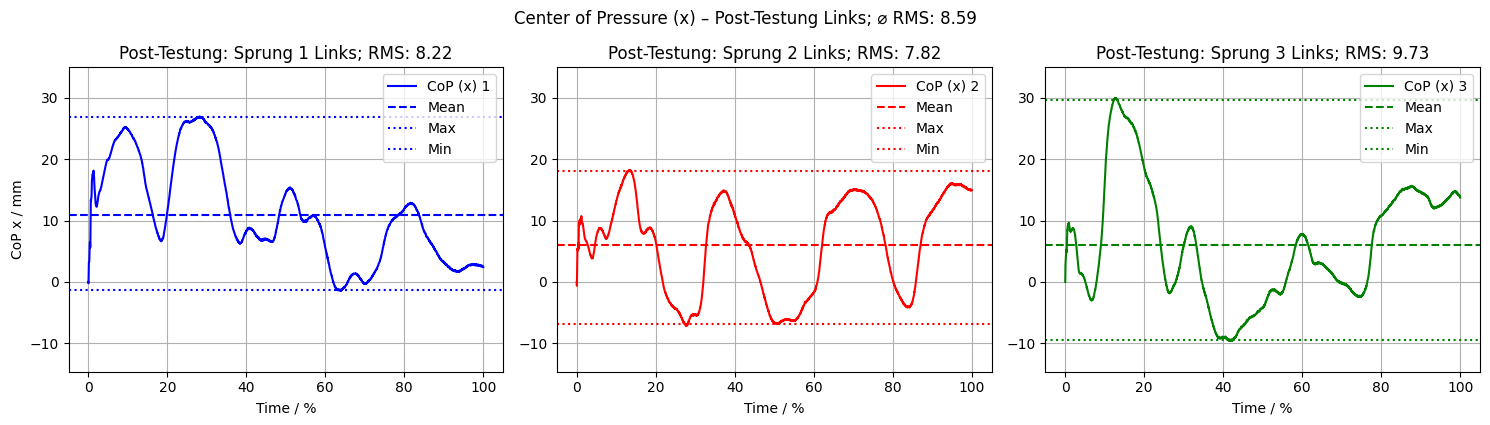

RMS-Werte: 8.216039171049072 7.815378691551552 9.733677584870652


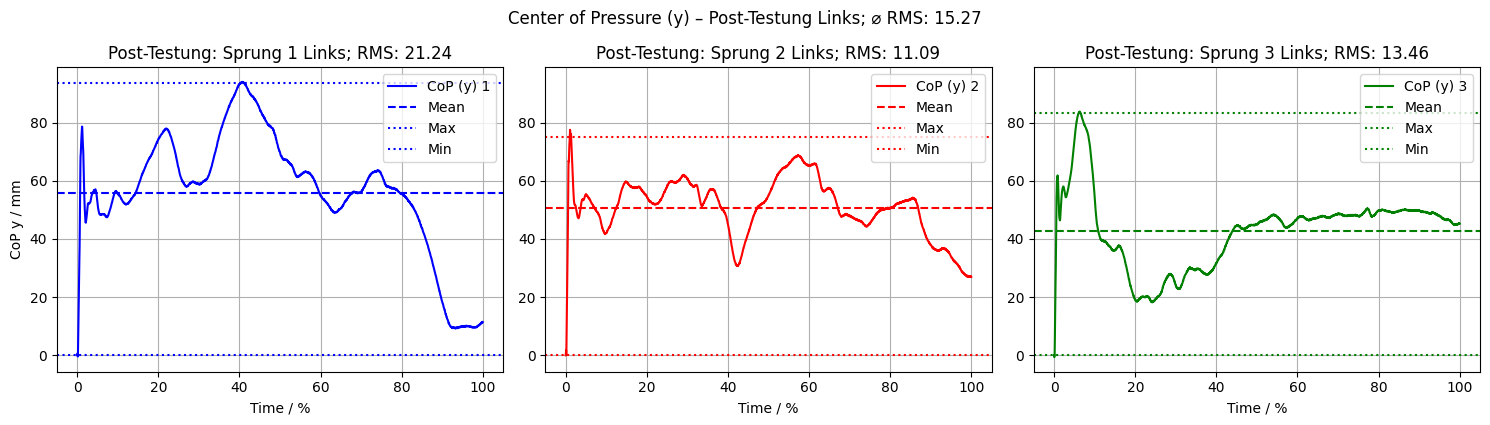

RMS-Werte: 21.244944687795922 11.090863495641983 13.463805792896785


In [213]:
# CSVs für links einlesen
PostLi1 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-27_Post_C_Li_1.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
PostLi2 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-27_Post_C_Li_2.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
PostLi3 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-28_Post_C_Li_3.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)

# Zeitachsen bereinigen
time1 = PostLi1["time"] - PostLi1["time"][0]
time2 = PostLi2["time"] - PostLi2["time"][0]
time3 = PostLi3["time"] - PostLi3["time"][0]

# GRFz extrahieren für Landungserkennung
GRFz1 = PostLi1["Force plate group-Ground reaction force-z (N)"]
GRFz2 = PostLi2["Force plate group-Ground reaction force-z (N)"]
GRFz3 = PostLi3["Force plate group-Ground reaction force-z (N)"]

# Landepeaks erkennen
from scipy.signal import find_peaks

peaks1, _ = find_peaks(GRFz1, height=4000)
peaks2, _ = find_peaks(GRFz2, height=4000)
peaks3, _ = find_peaks(GRFz3, height=4000)
#print("Peaks in GRFz1: ", peaks1)
print("Zeitpunkt Peak1: ",time1[peaks1])
#print("Peaks in GRFz2: ", peaks2)
print("Zeitpunkt Peak2: ",time2[peaks2])
#print("Peaks in GRFz3: ", peaks3)
print("Zeitpunkt Peak3: ",time3[peaks3])

# plt.figure(figsize=(10, 5))
# #plt.plot(time3, GRFx3, label='GRFx', color='blue')
# #plt.plot(time3, GRFy3, label='GRFy', color='red')
# plt.plot(time2, GRFz2, label='GRFz', color='green')
# plt.title('Ground Reaction Force (GRF)')
# plt.xlabel('Time (s)')
# plt.ylabel('Force / N')
# #mark landing peak with an x 
# plt.scatter(time2[peaks2], GRFz2[peaks2], color='black', label='Landing Peaks', marker='x')
# plt.legend()
# plt.grid()
# plt.show()

# CoP x extrahieren
CoPx1 = PostLi1["Force plate group-Center of pressure-x (mm)"]
CoPx2 = PostLi2["Force plate group-Center of pressure-x (mm)"]
CoPx3 = PostLi3["Force plate group-Center of pressure-x (mm)"]

# Normieren ab Landezeitpunkt
CoPx1_norm = CoPx1[peaks1[0]:] - CoPx1[peaks1[0]]
CoPx2_norm = CoPx2[peaks2[0]:] - CoPx2[peaks2[0]]
CoPx3_norm = CoPx3[peaks3[0]:] - CoPx3[peaks3[0]]
time1_norm = time1[peaks1[0]:] - time1[peaks1[0]]
time2_norm = time2[peaks2[0]:] - time2[peaks2[0]]
time3_norm = time3[peaks3[0]:] - time3[peaks3[0]]
time1_norm = time1_norm / time1_norm.max() * 100
time2_norm = time2_norm / time2_norm.max() * 100
time3_norm = time3_norm / time3_norm.max() * 100

# Interpolation auf 100 Punkte
from scipy.interpolate import interp1d
import numpy as np

def resample_to_100(time, signal):
    f = interp1d(time, signal, kind='linear')
    time_uniform = np.linspace(0, 100, 100)
    signal_uniform = f(time_uniform)
    return signal_uniform

copx1_100 = resample_to_100(time1_norm, CoPx1_norm)
copx2_100 = resample_to_100(time2_norm, CoPx2_norm)
copx3_100 = resample_to_100(time3_norm, CoPx3_norm)

# Kennwerte berechnen
copx1_mean = np.mean(copx1_100)
copx1_max = np.max(copx1_100)
copx1_min = np.min(copx1_100)
copx1_rms = np.sqrt(np.mean((copx1_100 - copx1_mean) ** 2))

copx2_mean = np.mean(copx2_100)
copx2_max = np.max(copx2_100)
copx2_min = np.min(copx2_100)
copx2_rms = np.sqrt(np.mean((copx2_100 - copx2_mean) ** 2))

copx3_mean = np.mean(copx3_100)
copx3_max = np.max(copx3_100)
copx3_min = np.min(copx3_100)
copx3_rms = np.sqrt(np.mean((copx3_100 - copx3_mean) ** 2))

mean_rms = np.mean([copx1_rms, copx2_rms, copx3_rms])

# Gemeinsame Y-Achse
ymin = min(CoPx1_norm.min(), CoPx2_norm.min(), CoPx3_norm.min()) - 5
ymax = max(CoPx1_norm.max(), CoPx2_norm.max(), CoPx3_norm.max()) + 5

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(time1_norm, CoPx1_norm, color='blue', label='CoP (x) 1')
plt.axhline(y=copx1_mean, color='blue', linestyle='--', label='Mean')
plt.axhline(y=copx1_max, color='blue', linestyle=':', label='Max')
plt.axhline(y=copx1_min, color='blue', linestyle=':', label='Min')
plt.title('Post-Testung: Sprung 1 Links; RMS: {:.2f}'.format(copx1_rms))
plt.xlabel('Time / %')
plt.ylabel('CoP x / mm')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(time2_norm, CoPx2_norm, color='red', label='CoP (x) 2')
plt.axhline(y=copx2_mean, color='red', linestyle='--', label='Mean')
plt.axhline(y=copx2_max, color='red', linestyle=':', label='Max')
plt.axhline(y=copx2_min, color='red', linestyle=':', label='Min')
plt.title('Post-Testung: Sprung 2 Links; RMS: {:.2f}'.format(copx2_rms))
plt.xlabel('Time / %')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(time3_norm, CoPx3_norm, color='green', label='CoP (x) 3')
plt.axhline(y=copx3_mean, color='green', linestyle='--', label='Mean')
plt.axhline(y=copx3_max, color='green', linestyle=':', label='Max')
plt.axhline(y=copx3_min, color='green', linestyle=':', label='Min')
plt.title('Post-Testung: Sprung 3 Links; RMS: {:.2f}'.format(copx3_rms))
plt.xlabel('Time / %')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

plt.tight_layout()
plt.suptitle('Center of Pressure (x) – Post-Testung Links; ⌀ RMS: {:.2f}'.format(mean_rms), y=1.05)
plt.show()

print("RMS-Werte:", copx1_rms, copx2_rms, copx3_rms)

# CoPy y extrahieren
CoPy1 = PostLi1["Force plate group-Center of pressure-y (mm)"]
CoPy2 = PostLi2["Force plate group-Center of pressure-y (mm)"]
CoPy3 = PostLi3["Force plate group-Center of pressure-y (mm)"]
# Normieren ab Landezeitpunkt
CoPy1_norm = CoPy1[peaks1[0]:] - CoPy1[peaks1[0]]
CoPy2_norm = CoPy2[peaks2[0]:] - CoPy2[peaks2[0]]
CoPy3_norm = CoPy3[peaks3[0]:] - CoPy3[peaks3[0]]
time1_norm = time1[peaks1[0]:] - time1[peaks1[0]]
time2_norm = time2[peaks2[0]:] - time2[peaks2[0]]
time3_norm = time3[peaks3[0]:] - time3[peaks3[0]]
time1_norm = time1_norm / time1_norm.max() * 100
time2_norm = time2_norm / time2_norm.max() * 100
time3_norm = time3_norm / time3_norm.max() * 100
# Interpolation auf 100 Punkte
copy1_100 = resample_to_100(time1_norm, CoPy1_norm)
copy2_100 = resample_to_100(time2_norm, CoPy2_norm)
copy3_100 = resample_to_100(time3_norm, CoPy3_norm)
# Kennwerte berechnen
copy1_mean = np.mean(copy1_100)
copy1_max = np.max(copy1_100)
copy1_min = np.min(copy1_100)
copy1_rms = np.sqrt(np.mean((copy1_100 - copy1_mean) ** 2))
copy2_mean = np.mean(copy2_100)
copy2_max = np.max(copy2_100)
copy2_min = np.min(copy2_100)
copy2_rms = np.sqrt(np.mean((copy2_100 - copy2_mean) ** 2))
copy3_mean = np.mean(copy3_100)
copy3_max = np.max(copy3_100)
copy3_min = np.min(copy3_100)
copy3_rms = np.sqrt(np.mean((copy3_100 - copy3_mean) ** 2))
mean_rms = np.mean([copy1_rms, copy2_rms, copy3_rms])
# Gemeinsame Y-Achse
ymin = min(CoPy1_norm.min(), CoPy2_norm.min(), CoPy3_norm.min()) - 5
ymax = max(CoPy1_norm.max(), CoPy2_norm.max(), CoPy3_norm.max()) + 5
# Plot
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(time1_norm, CoPy1_norm, color='blue', label='CoP (y) 1')
plt.axhline(y=copy1_mean, color='blue', linestyle='--', label='Mean')
plt.axhline(y=copy1_max, color='blue', linestyle=':', label='Max')
plt.axhline(y=copy1_min, color='blue', linestyle=':', label='Min')
plt.title('Post-Testung: Sprung 1 Links; RMS: {:.2f}'.format(copy1_rms))
plt.xlabel('Time / %')
plt.ylabel('CoP y / mm')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(time2_norm, CoPy2_norm, color='red', label='CoP (y) 2')
plt.axhline(y=copy2_mean, color='red', linestyle='--', label='Mean')
plt.axhline(y=copy2_max, color='red', linestyle=':', label='Max')
plt.axhline(y=copy2_min, color='red', linestyle=':', label='Min')
plt.title('Post-Testung: Sprung 2 Links; RMS: {:.2f}'.format(copy2_rms))
plt.xlabel('Time / %')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(time3_norm, CoPy3_norm, color='green', label='CoP (y) 3')
plt.axhline(y=copy3_mean, color='green', linestyle='--', label='Mean')
plt.axhline(y=copy3_max, color='green', linestyle=':', label='Max')
plt.axhline(y=copy3_min, color='green', linestyle=':', label='Min')
plt.title('Post-Testung: Sprung 3 Links; RMS: {:.2f}'.format(copy3_rms))
plt.xlabel('Time / %')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()
plt.tight_layout()
plt.suptitle('Center of Pressure (y) – Post-Testung Links; ⌀ RMS: {:.2f}'.format(mean_rms), y=1.05)
plt.show()
print("RMS-Werte:", copy1_rms, copy2_rms, copy3_rms)


C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\686179126.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PostRe1 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-20_Post_C_Re_1.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\686179126.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PostRe2 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-24_Post_C_Re_2.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\686179126.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PostRe3 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-25_Post_C_Re_3.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)


Zeitpunkt Peak1:  3038    3.038
Name: time, dtype: float64
Zeitpunkt Peak2:  2977    2.977
Name: time, dtype: float64
Zeitpunkt Peak3:  3124    3.124
Name: time, dtype: float64


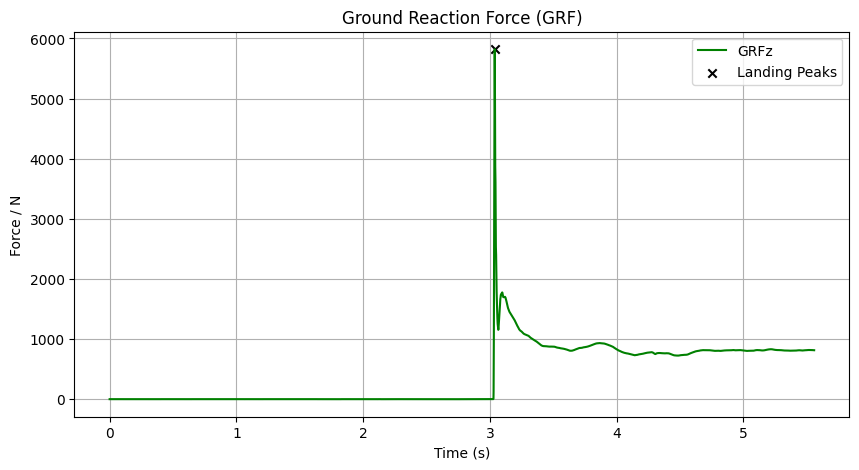

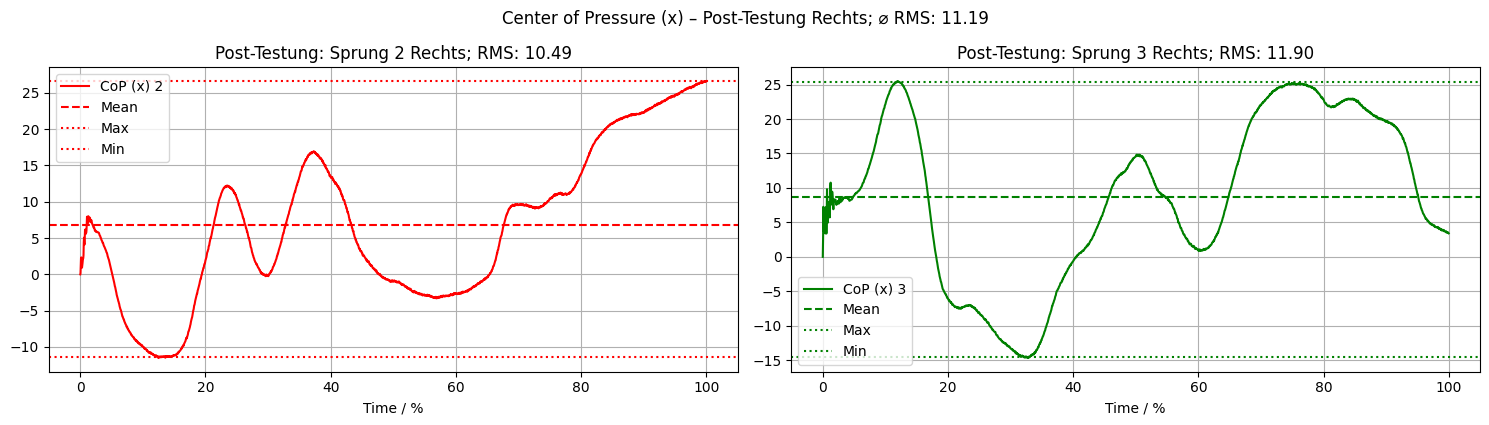

RMS-Werte: 10.485946007086172 11.896434578399596


In [214]:
# CSVs für rechts einlesen
PostRe1 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-20_Post_C_Re_1.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
PostRe2 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-24_Post_C_Re_2.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
PostRe3 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-25_Post_C_Re_3.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)

# Zeitachsen bereinigen
time1 = PostRe1["time"] - PostRe1["time"][0]
time2 = PostRe2["time"] - PostRe2["time"][0]
time3 = PostRe3["time"] - PostRe3["time"][0]

# GRFz extrahieren für Landungserkennung
GRFz1 = PostRe1["Force plate group-Ground reaction force-z (N)"] - PostRe1["Force plate group-Ground reaction force-z (N)"][0]
GRFz2 = PostRe2["Force plate group-Ground reaction force-z (N)"]
GRFz3 = PostRe3["Force plate group-Ground reaction force-z (N)"]

# Landepeaks erkennen
from scipy.signal import find_peaks

peaks1, _ = find_peaks(GRFz1, height=4000)
peaks2, _ = find_peaks(GRFz2, height=4000)
peaks3, _ = find_peaks(GRFz3, height=4000)
#print("Peaks in GRFz1: ", peaks1)
print("Zeitpunkt Peak1: ",time1[peaks1])
#print("Peaks in GRFz2: ", peaks2)
print("Zeitpunkt Peak2: ",time2[peaks2])
#print("Peaks in GRFz3: ", peaks3)
print("Zeitpunkt Peak3: ",time3[peaks3])

plt.figure(figsize=(10, 5))
#plt.plot(time3, GRFx3, label='GRFx', color='blue')
#plt.plot(time3, GRFy3, label='GRFy', color='red')
plt.plot(time1, GRFz1, label='GRFz', color='green')
plt.title('Ground Reaction Force (GRF)')
plt.xlabel('Time (s)')
plt.ylabel('Force / N')
#mark landing peak with an x 
plt.scatter(time1[peaks1], GRFz1[peaks1], color='black', label='Landing Peaks', marker='x')
plt.legend()
plt.grid()
plt.show()

# CoP x extrahieren
CoPx1 = PostRe1["Force plate group-Center of pressure-x (mm)"] 
CoPx2 = PostRe2["Force plate group-Center of pressure-x (mm)"]
CoPx3 = PostRe3["Force plate group-Center of pressure-x (mm)"]

# Normieren ab Landezeitpunkt
CoPx1_norm = CoPx1[peaks1[0]:] - CoPx1[peaks1[0]]
CoPx2_norm = CoPx2[peaks2[0]:] - CoPx2[peaks2[0]]
CoPx3_norm = CoPx3[peaks3[0]:] - CoPx3[peaks3[0]]
time1_norm = time1[peaks1[0]:] - time1[peaks1[0]]
time2_norm = time2[peaks2[0]:] - time2[peaks2[0]]
time3_norm = time3[peaks3[0]:] - time3[peaks3[0]]
time1_norm = time1_norm / time1_norm.max() * 100
time2_norm = time2_norm / time2_norm.max() * 100
time3_norm = time3_norm / time3_norm.max() * 100

# Interpolation auf 100 Punkte
from scipy.interpolate import interp1d
import numpy as np

def resample_to_100(time, signal):
    f = interp1d(time, signal, kind='linear')
    time_uniform = np.linspace(0, 100, 100)
    signal_uniform = f(time_uniform)
    return signal_uniform

copx1_100 = resample_to_100(time1_norm, CoPx1_norm)
copx2_100 = resample_to_100(time2_norm, CoPx2_norm)
copx3_100 = resample_to_100(time3_norm, CoPx3_norm)

# Kennwerte berechnen
copx1_mean = np.mean(copx1_100)
copx1_max = np.max(copx1_100)
copx1_min = np.min(copx1_100)
copx1_rms = np.sqrt(np.mean((copx1_100 - copx1_mean) ** 2))

copx2_mean = np.mean(copx2_100)
copx2_max = np.max(copx2_100)
copx2_min = np.min(copx2_100)
copx2_rms = np.sqrt(np.mean((copx2_100 - copx2_mean) ** 2))

copx3_mean = np.mean(copx3_100)
copx3_max = np.max(copx3_100)
copx3_min = np.min(copx3_100)
copx3_rms = np.sqrt(np.mean((copx3_100 - copx3_mean) ** 2))

mean_rms = np.mean([copx2_rms, copx3_rms])

# Gemeinsame Y-Achse
ymin = min(CoPx1_norm.min(), CoPx2_norm.min(), CoPx3_norm.min()) - 5
ymax = max(CoPx1_norm.max(), CoPx2_norm.max(), CoPx3_norm.max()) + 5

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))

# plt.subplot(1, 3, 1)
# plt.plot(time1_norm, CoPx1_norm, color='blue', label='CoP (x) 1')
# plt.axhline(y=copx1_mean, color='blue', linestyle='--', label='Mean')
# plt.axhline(y=copx1_max, color='blue', linestyle=':', label='Max')
# plt.axhline(y=copx1_min, color='blue', linestyle=':', label='Min')
# plt.title('Post-Testung: Sprung 1 Links; RMS: {:.2f}'.format(copx1_rms))
# plt.xlabel('Time / %')
# plt.ylabel('CoP x / mm')
# #plt.ylim(ymin, ymax)
# plt.grid()
# plt.legend()

plt.subplot(1, 2, 1)
plt.plot(time2_norm, CoPx2_norm, color='red', label='CoP (x) 2')
plt.axhline(y=copx2_mean, color='red', linestyle='--', label='Mean')
plt.axhline(y=copx2_max, color='red', linestyle=':', label='Max')
plt.axhline(y=copx2_min, color='red', linestyle=':', label='Min')
plt.title('Post-Testung: Sprung 2 Rechts; RMS: {:.2f}'.format(copx2_rms))
plt.xlabel('Time / %')
#plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time3_norm, CoPx3_norm, color='green', label='CoP (x) 3')
plt.axhline(y=copx3_mean, color='green', linestyle='--', label='Mean')
plt.axhline(y=copx3_max, color='green', linestyle=':', label='Max')
plt.axhline(y=copx3_min, color='green', linestyle=':', label='Min')
plt.title('Post-Testung: Sprung 3 Rechts; RMS: {:.2f}'.format(copx3_rms))
plt.xlabel('Time / %')
#plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

plt.tight_layout()
plt.suptitle('Center of Pressure (x) – Post-Testung Rechts; ⌀ RMS: {:.2f}'.format(mean_rms), y=1.05)
plt.show()

print("RMS-Werte:",  copx2_rms, copx3_rms)


C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\3952128218.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PostLi1 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-27_Post_C_Li_1.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\3952128218.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PostLi2 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-27_Post_C_Li_2.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\3952128218.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PostLi3 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-28_Post_C_Li_3.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)


Zeitpunkt Peak1:  3719    3.719
Name: time, dtype: float64
Zeitpunkt Peak2:  2865    2.865
Name: time, dtype: float64
Zeitpunkt Peak3:  3565    3.565
Name: time, dtype: float64


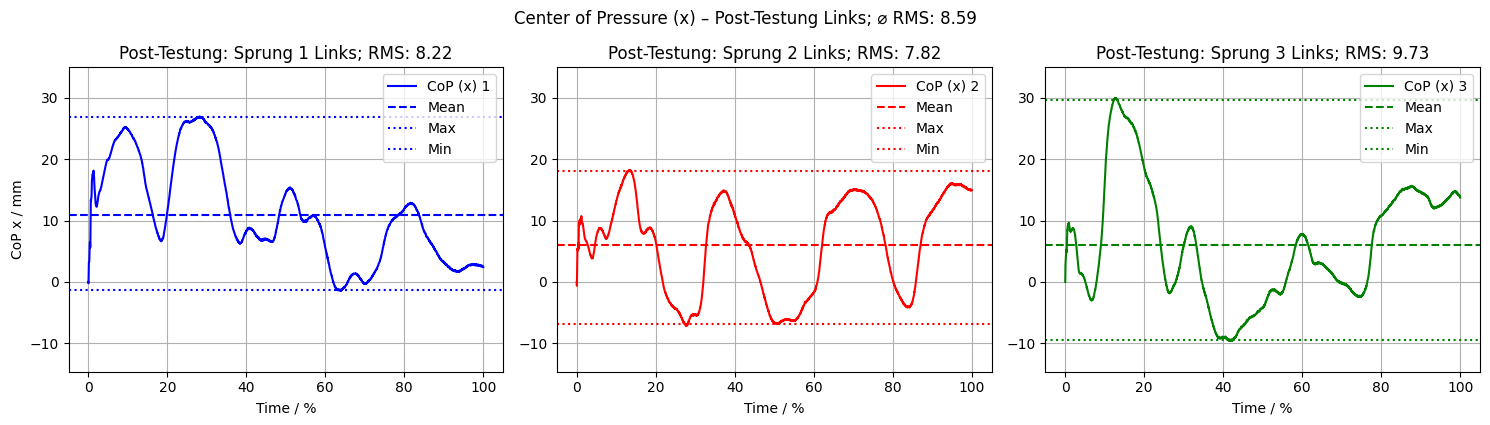

RMS-Werte: 8.216039171049072 7.815378691551552 9.733677584870652


In [215]:
# CSVs für links einlesen
PostLi1 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-27_Post_C_Li_1.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
PostLi2 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-27_Post_C_Li_2.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)
PostLi3 = pd.read_csv("C_Daten_Schröter_Till/2025-05-15-09-28_Post_C_Li_3.csv", delimiter=';', encoding='utf-8', decimal=',', skiprows=3)

# Zeitachsen bereinigen
time1 = PostLi1["time"] - PostLi1["time"][0]
time2 = PostLi2["time"] - PostLi2["time"][0]
time3 = PostLi3["time"] - PostLi3["time"][0]

# GRFz extrahieren für Landungserkennung
GRFz1 = PostLi1["Force plate group-Ground reaction force-z (N)"]
GRFz2 = PostLi2["Force plate group-Ground reaction force-z (N)"]
GRFz3 = PostLi3["Force plate group-Ground reaction force-z (N)"]

# Landepeaks erkennen
from scipy.signal import find_peaks

peaks1, _ = find_peaks(GRFz1, height=4000)
peaks2, _ = find_peaks(GRFz2, height=4000)
peaks3, _ = find_peaks(GRFz3, height=4000)
#print("Peaks in GRFz1: ", peaks1)
print("Zeitpunkt Peak1: ",time1[peaks1])
#print("Peaks in GRFz2: ", peaks2)
print("Zeitpunkt Peak2: ",time2[peaks2])
#print("Peaks in GRFz3: ", peaks3)
print("Zeitpunkt Peak3: ",time3[peaks3])

# plt.figure(figsize=(10, 5))
# #plt.plot(time3, GRFx3, label='GRFx', color='blue')
# #plt.plot(time3, GRFy3, label='GRFy', color='red')
# plt.plot(time2, GRFz2, label='GRFz', color='green')
# plt.title('Ground Reaction Force (GRF)')
# plt.xlabel('Time (s)')
# plt.ylabel('Force / N')
# #mark landing peak with an x 
# plt.scatter(time2[peaks2], GRFz2[peaks2], color='black', label='Landing Peaks', marker='x')
# plt.legend()
# plt.grid()
# plt.show()

# CoP x extrahieren
CoPx1 = PostLi1["Force plate group-Center of pressure-x (mm)"]
CoPx2 = PostLi2["Force plate group-Center of pressure-x (mm)"]
CoPx3 = PostLi3["Force plate group-Center of pressure-x (mm)"]

# Normieren ab Landezeitpunkt
CoPx1_norm = CoPx1[peaks1[0]:] - CoPx1[peaks1[0]]
CoPx2_norm = CoPx2[peaks2[0]:] - CoPx2[peaks2[0]]
CoPx3_norm = CoPx3[peaks3[0]:] - CoPx3[peaks3[0]]
time1_norm = time1[peaks1[0]:] - time1[peaks1[0]]
time2_norm = time2[peaks2[0]:] - time2[peaks2[0]]
time3_norm = time3[peaks3[0]:] - time3[peaks3[0]]
time1_norm = time1_norm / time1_norm.max() * 100
time2_norm = time2_norm / time2_norm.max() * 100
time3_norm = time3_norm / time3_norm.max() * 100

# Interpolation auf 100 Punkte
from scipy.interpolate import interp1d
import numpy as np

def resample_to_100(time, signal):
    f = interp1d(time, signal, kind='linear')
    time_uniform = np.linspace(0, 100, 100)
    signal_uniform = f(time_uniform)
    return signal_uniform

copx1_100 = resample_to_100(time1_norm, CoPx1_norm)
copx2_100 = resample_to_100(time2_norm, CoPx2_norm)
copx3_100 = resample_to_100(time3_norm, CoPx3_norm)

# Kennwerte berechnen
copx1_mean = np.mean(copx1_100)
copx1_max = np.max(copx1_100)
copx1_min = np.min(copx1_100)
copx1_rms = np.sqrt(np.mean((copx1_100 - copx1_mean) ** 2))

copx2_mean = np.mean(copx2_100)
copx2_max = np.max(copx2_100)
copx2_min = np.min(copx2_100)
copx2_rms = np.sqrt(np.mean((copx2_100 - copx2_mean) ** 2))

copx3_mean = np.mean(copx3_100)
copx3_max = np.max(copx3_100)
copx3_min = np.min(copx3_100)
copx3_rms = np.sqrt(np.mean((copx3_100 - copx3_mean) ** 2))

mean_rms = np.mean([copx1_rms, copx2_rms, copx3_rms])

# Gemeinsame Y-Achse
ymin = min(CoPx1_norm.min(), CoPx2_norm.min(), CoPx3_norm.min()) - 5
ymax = max(CoPx1_norm.max(), CoPx2_norm.max(), CoPx3_norm.max()) + 5

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(time1_norm, CoPx1_norm, color='blue', label='CoP (x) 1')
plt.axhline(y=copx1_mean, color='blue', linestyle='--', label='Mean')
plt.axhline(y=copx1_max, color='blue', linestyle=':', label='Max')
plt.axhline(y=copx1_min, color='blue', linestyle=':', label='Min')
plt.title('Post-Testung: Sprung 1 Links; RMS: {:.2f}'.format(copx1_rms))
plt.xlabel('Time / %')
plt.ylabel('CoP x / mm')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(time2_norm, CoPx2_norm, color='red', label='CoP (x) 2')
plt.axhline(y=copx2_mean, color='red', linestyle='--', label='Mean')
plt.axhline(y=copx2_max, color='red', linestyle=':', label='Max')
plt.axhline(y=copx2_min, color='red', linestyle=':', label='Min')
plt.title('Post-Testung: Sprung 2 Links; RMS: {:.2f}'.format(copx2_rms))
plt.xlabel('Time / %')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(time3_norm, CoPx3_norm, color='green', label='CoP (x) 3')
plt.axhline(y=copx3_mean, color='green', linestyle='--', label='Mean')
plt.axhline(y=copx3_max, color='green', linestyle=':', label='Max')
plt.axhline(y=copx3_min, color='green', linestyle=':', label='Min')
plt.title('Post-Testung: Sprung 3 Links; RMS: {:.2f}'.format(copx3_rms))
plt.xlabel('Time / %')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

plt.tight_layout()
plt.suptitle('Center of Pressure (x) – Post-Testung Links; ⌀ RMS: {:.2f}'.format(mean_rms), y=1.05)
plt.show()

print("RMS-Werte:", copx1_rms, copx2_rms, copx3_rms)
